## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
#see what's in each file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#see whats in each file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
combined_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26
96,o725,0,45.000000,0,Naftisol,Male,4,26
97,o725,5,46.889821,0,Naftisol,Male,4,26
98,o725,10,48.199452,0,Naftisol,Male,4,26


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [6]:
#group by the drug and timepoints
drug_group = combined_df.groupby(['Drug Regimen'])
drug_group.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29


In [7]:
#mean
mean_tumor_volume = drug_group['Tumor Volume (mm3)'].mean()
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
mean_tumor_volume_df.head(5)


,Mean Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


In [8]:
#median
median_tumor_volume = drug_group['Tumor Volume (mm3)'].median()
median_tumor_volume_df = pd.DataFrame(median_tumor_volume)
median_tumor_volume_df = median_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"})
#median_tumor_volume_df.head(5)

In [9]:
#variance
var_tumor_volume = drug_group['Tumor Volume (mm3)'].var()
var_tumor_volume_df = pd.DataFrame(var_tumor_volume)
var_tumor_volume_df = var_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Var (mm3)"})
#var_tumor_volume_df.head(5)

In [10]:
#standard deviation
stdev_tumor_volume = drug_group['Tumor Volume (mm3)'].std()
stdev_tumor_volume_df = pd.DataFrame(stdev_tumor_volume)
stdev_tumor_volume_df = stdev_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume St_Dev (mm3)"})
#stdev_tumor_volume_df.head(5)

In [11]:
#SEM
sem_tumor_volume = drug_group['Tumor Volume (mm3)'].sem()
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume)
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM (mm3)"})
#sem_tumor_volume_df.head(5)

In [12]:
#combine summary tables
summary_stats_df = pd.merge(mean_tumor_volume_df, median_tumor_volume_df, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, var_tumor_volume_df, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, stdev_tumor_volume_df, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, sem_tumor_volume_df, on="Drug Regimen")

summary_stats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Var (mm3),Tumor Volume St_Dev (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# get to needed data
measurements = drug_group['Timepoint'].count()
measurements_df = pd.DataFrame(measurements)
measurements_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


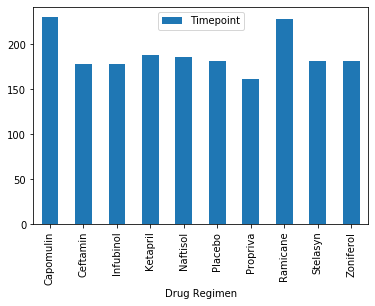

In [14]:
pandas_plot = measurements_df.plot.bar()
pandas_plot

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# you can't reference the index as an label with x-ticks ... that took so long to catch
measurements_df = measurements_df.reset_index()
measurements_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


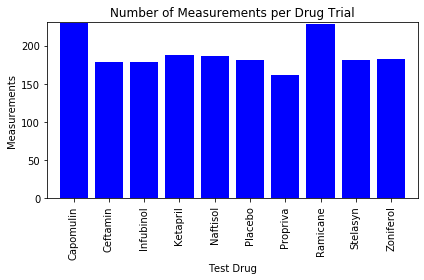

In [16]:
#x-axis and labels
x_axis = np.arange(len(measurements_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements_df["Drug Regimen"], rotation="vertical")
#axis sizes:
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(measurements_df["Timepoint"])+0.4)
#Titles
plt.title("Number of Measurements per Drug Trial")
plt.xlabel("Test Drug")
plt.ylabel("Measurements")
#plot bar
plt.bar(x_axis,measurements_df["Timepoint"], color="b", align="center")
#format to not cut off the drug names and x title
plt.tight_layout()

## Pie plots

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#make dataframe
combined_df.head()
sexed_group = combined_df.groupby(['Sex'])
sexed_group.head()
sex_distribution = sexed_group['Sex'].count()
sex_distribution = pd.DataFrame(sex_distribution)
sex_distribution = sex_distribution.rename(columns={"Sex":"Count"})
sex_distribution


,Count
Sex,
Female,935
Male,958


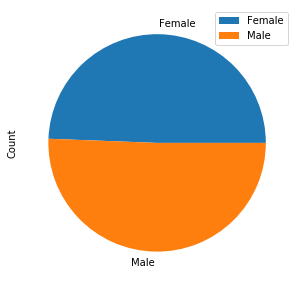

In [18]:
#plot with pandas
pandas_pie = sex_distribution.plot.pie(y="Count", figsize = (5,5))
pandas_pie

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#redo dataframe with new index so sex col. can be referenced
sex_distribution2 = sex_distribution.reset_index()
sex_distribution2

,Sex,Count
0,Female,935
1,Male,958


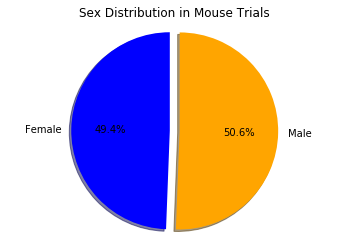

In [20]:
#inputs
colors = ["blue","orange"]
explode = [.1,0]

plt.title("Sex Distribution in Mouse Trials")

plt.pie(sex_distribution2["Count"], explode=explode, labels=sex_distribution2["Sex"], colors = colors, autopct="%1.1f%%", shadow =True, startangle=90)
plt.axis("equal")
plt.show()

#unsure how to not make this render over the other pie chart above ... I remvoed the %matplotlib-notebook so it should render again...

## Quartiles, outliers and boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#first need to determine the four best -- line chart to see avg tumor size over time
avg_impact_df = combined_df.groupby(["Drug Regimen","Timepoint"])
#avg_impact_df = avg_impact_df["Drug Regimen","Timepoint","Tumor Volume (mm3)"]
avg_tumor_vol = avg_impact_df['Tumor Volume (mm3)'].mean()
avg_impact_df = pd.DataFrame(avg_tumor_vol)
avg_impact_df = avg_impact_df.rename(columns={"Tumor Volume (mm3)": "AVG Tumor Vol (mm3)"})
avg_impact_df = avg_impact_df.reset_index("Timepoint")
avg_impact_df



,Timepoint,AVG Tumor Vol (mm3)
Drug Regimen,,
Capomulin,0,45.000000
Capomulin,5,44.266086
Capomulin,10,43.084291
Capomulin,15,42.064317
Capomulin,20,40.716325
...,...,...
Zoniferol,25,55.432935
Zoniferol,30,57.713531
Zoniferol,35,60.089372


In [22]:
# pivot
avg_impact_df = avg_impact_df.reset_index()
pivot_avg_impact_df = avg_impact_df.pivot(index="Timepoint", columns="Drug Regimen", values="AVG Tumor Vol (mm3)")
pivot_avg_impact_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [23]:
# ID Capomulin and Ramicane as decreasing avg tumor volume

In [25]:
#Final Tumor Vol for each mouse treated with Capomulin, Ramicane, Infubinol, and Ceftamin
combined_df.head()
df = combined_df.set_index("Drug Regimen")
df = df.query("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
df

### can't get df to filter to just those four drugs... 

TypeError: query() takes from 2 to 3 positional arguments but 5 were given

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Giving up on this section for now -- issuse getting data frame to right input 

## Line and scatter plots

In [27]:
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:

combined_df = combined_df.set_index("Drug Regimen")
cap_drug = combined_df.loc[["Capomulin"]]
cap_drug = cap_drug.set_index("Mouse ID")
cap_drug = cap_drug.loc[["b128"]]
cap_drug
# not sure why I lose the name of the drug here. 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,
b128,0,45.000000,0,Female,9,22
b128,5,45.651331,0,Female,9,22
b128,10,43.270852,0,Female,9,22
b128,15,43.784893,0,Female,9,22
b128,20,42.731552,0,Female,9,22
b128,25,43.262145,1,Female,9,22
b128,30,40.605335,1,Female,9,22
b128,35,37.967644,1,Female,9,22
b128,40,38.379726,2,Female,9,22


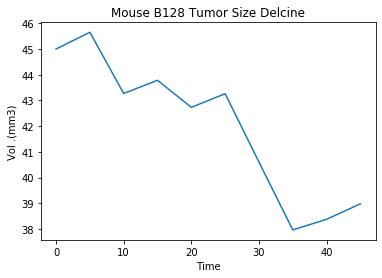

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axisb128 = cap_drug["Timepoint"]
y_axisb128 = cap_drug["Tumor Volume (mm3)"]

plt.title("Mouse B128 Tumor Size Delcine")
plt.xlabel("Time")
plt.ylabel("Vol .(mm3)")

plt.plot(x_axisb128, y_axisb128)

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
combined_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,m601,25,33.118756,1,Male,22,17
Capomulin,m601,30,31.758275,1,Male,22,17
Capomulin,m601,35,30.834357,1,Male,22,17
Capomulin,m601,40,31.378045,1,Male,22,17
Capomulin,m601,45,28.430964,1,Male,22,17


In [31]:
#re-using this df as starter
mouse_group = combined_df.groupby(['Mouse ID'])
mouse_group.head()

mean_tumor_volume = mouse_group['Tumor Volume (mm3)'].mean()
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
mean_tumor_volume_df.head(5)


,Mean Tumor Volume (mm3)
Mouse ID,
a203,56.312708
a251,55.237095
a262,58.611631
a275,52.770965
a366,54.639906


In [32]:
mouse_group = combined_df.groupby(['Mouse ID'])
mouse_group.head()

mean_weight = mouse_group['Weight (g)'].mean()
mean_weight_df = pd.DataFrame(mean_weight)
#mean_weight_df = mean_weight_df.rename(columns={"Weight (g)": "Weight"})
mean_weight_df.head(5)

,Weight (g)
Mouse ID,
a203,23
a251,25
a262,29
a275,28
a366,29


In [33]:
weight_vs_tumor = mean_weight_df.merge(mean_tumor_volume_df, on="Mouse ID", how="inner")

weight_vs_tumor.head()

,Weight (g),Mean Tumor Volume (mm3)
Mouse ID,,
a203,23,56.312708
a251,25,55.237095
a262,29,58.611631
a275,28,52.770965
a366,29,54.639906


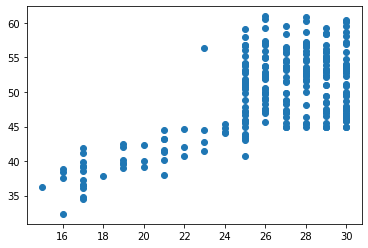

In [34]:
x_values = weight_vs_tumor["Weight (g)"]
y_values = weight_vs_tumor["Mean Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correllation = st.pearsonr(x_values,y_values)
print(f" Correllation {correllation[0]}")


 Correllation 0.6592482941546904


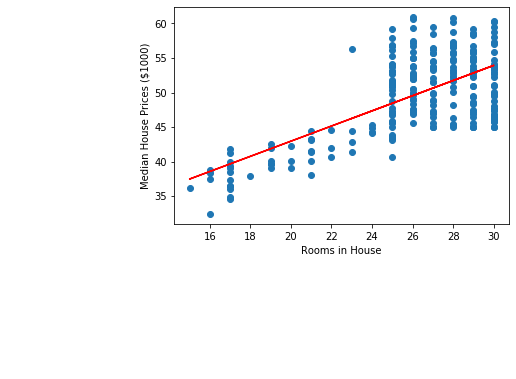

The r-squared is: 0.6592482941546901


In [36]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
print(f"The r-squared is: {rvalue}")
